# Problem Statement :

## The presence of chemicals in the air is determined through a series of electrochemical gas sensors (MQ1, MQ2, MQ3, MQ4, MQ5 & MQ6) which in turn has an impact on the CO2 level present in the air. Create a model which will predict 1 of the 4 categories of CO2 levels as a function of the 6 sensors

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

In [2]:
# Magnitude of various gases measured by MQ sensors 
df = pd.read_csv('dataset.csv', names=['MQ1', 'MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ6', 'CO2'])
df.head()

,MQ1,MQ2,MQ3,MQ4,MQ5,MQ6,CO2
0,670,696,1252,1720,1321,2431,4
1,641,674,1156,1652,1410,2433,4
2,642,646,1159,1643,1455,2361,4
3,640,590,1105,1608,1459,2427,4
4,616,627,1192,1637,1466,2447,4


In [3]:
df.shape

(1845, 7)

In [4]:
data = df.copy()

In [5]:
data['CO2'].unique()

array([4, 3, 1, 2], dtype=int64)

# Preprocessing

In [6]:
data.isnull().sum()

MQ1    0
MQ2    0
MQ3    0
MQ4    0
MQ5    0
MQ6    0
CO2    0
dtype: int64

## No null values present within the dataset

## Outliers

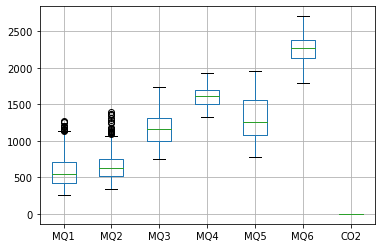

In [7]:
data.boxplot()
plt.show()

## Features with outliers :

1) MQ2

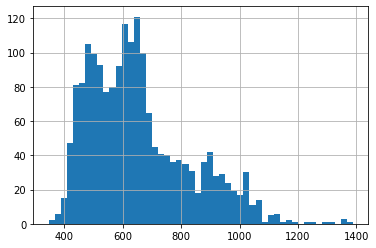

In [8]:
data['MQ2'].hist(bins=50)
plt.show()

#### The feature 'MQ2' follows a Normal Distribution; hence we use *3 Sigma method* to handle the outliers

In [9]:
def handle_outliers(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()
    
    df.loc[df[variable] >= upper_boundary, variable] = upper_boundary

    df.loc[df[variable] <= lower_boundary, variable] = lower_boundary

In [10]:
handle_outliers(data, 'MQ2')

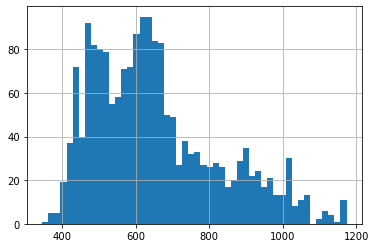

In [11]:
data['MQ2'].hist(bins=50)
plt.show()

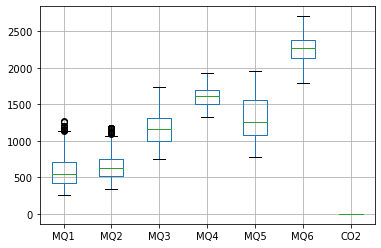

In [12]:
data.boxplot()
plt.show()

## Train - Test Split

In [13]:
X = data.copy()
X.drop(['CO2'], axis=1, inplace=True)
X.head()

,MQ1,MQ2,MQ3,MQ4,MQ5,MQ6
0,670,696.0,1252,1720,1321,2431
1,641,674.0,1156,1652,1410,2433
2,642,646.0,1159,1643,1455,2361
3,640,590.0,1105,1608,1459,2427
4,616,627.0,1192,1637,1466,2447


In [14]:
y = data['CO2']
y.head()

0    4
1    4
2    4
3    4
4    4
Name: CO2, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [16]:
X_train.shape, X_test.shape

((1236, 6), (609, 6))

## Feature Scaling : Standardizing

In [17]:
sc = StandardScaler()

In [18]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [19]:
# Standardized Training Data
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.head()

,MQ1,MQ2,MQ3,MQ4,MQ5,MQ6
0,1.120098,0.826004,0.114901,0.590895,1.599533,0.459965
1,-1.391215,-1.069169,-1.170478,-1.143391,-1.236056,0.105251
2,1.433337,1.842342,0.764866,1.716065,1.509342,1.394609
3,2.945525,2.440189,2.433433,1.597626,2.129853,-1.685211
4,0.877068,0.766219,1.332372,0.616274,1.004276,-0.942001


In [20]:
# Standardized Testing Data
X_test = pd.DataFrame(X_test, columns=X.columns)
X_test.head()

,MQ1,MQ2,MQ3,MQ4,MQ5,MQ6
0,-1.413649,-1.311125,-1.532497,-1.722348,-1.562623,0.367192
1,-0.106235,-0.274058,-0.194473,0.053656,-0.208792,0.799405
2,-0.470514,-0.543135,-0.428393,-0.313218,-0.303983,1.541105
3,0.068420,-0.061039,0.165765,0.278784,-0.021935,0.623318
4,0.961653,0.869518,1.321331,1.070898,1.141514,-1.110871


## Training

In [21]:
rf = RandomForestClassifier()

In [22]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
y_pred = rf.predict(X_test)

In [24]:
print('Accuracy : ', rf.score(X_test, y_test))

Accuracy :  0.9359605911330049


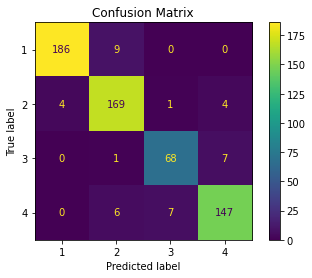

In [25]:
plot_confusion_matrix(rf, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()